In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
instrument_all = ['bass', 'cello', 'cymbals', 'drums', 'flute', 'guitar', 'mallet_percussion', 'organ',
                  'piano', 'saxophone', 'synthesizer', 'trumpet', 'violin', 'voice']
path_project = '/your/path/to/openmic/'
path_likelihood = path_project + 'fma20k_99th_likelihoods_20180326.csv'

prob of humans think instrument is there given model thinks instrument is there
bass


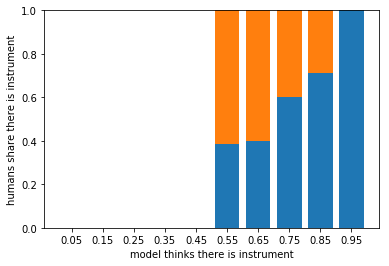

cello


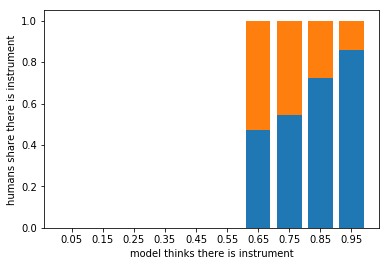

cymbals


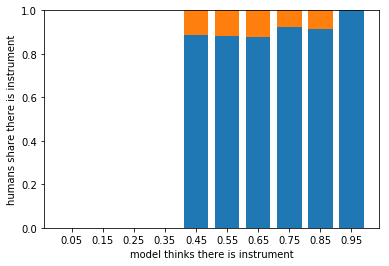

drums


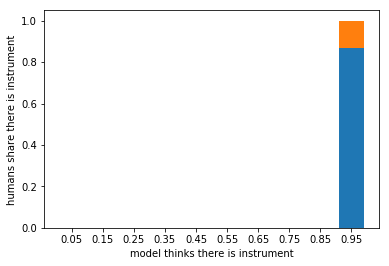

flute


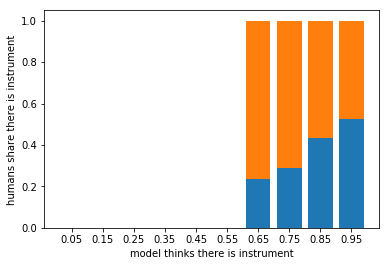

guitar


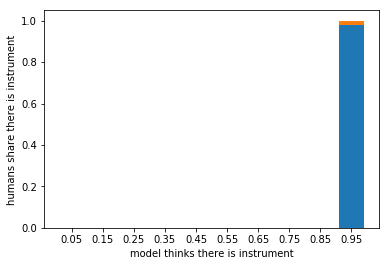

mallet_percussion


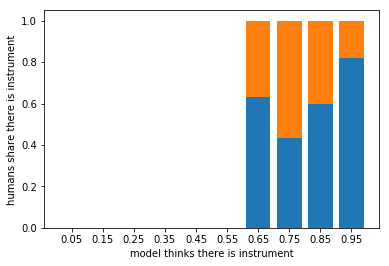

organ


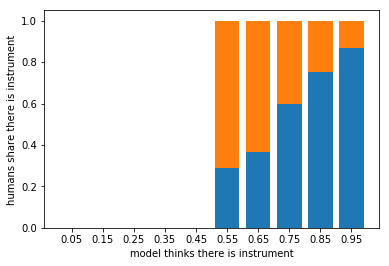

piano


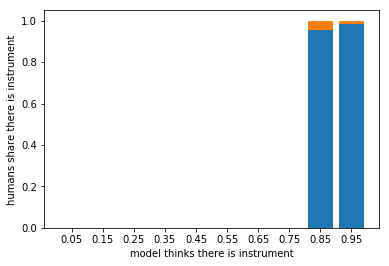

saxophone


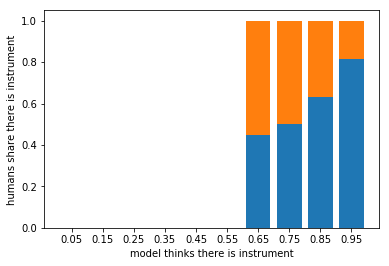

synthesizer


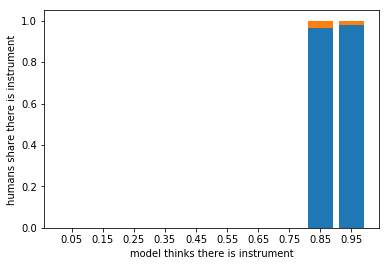

trumpet


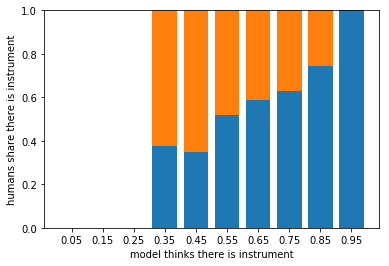

violin


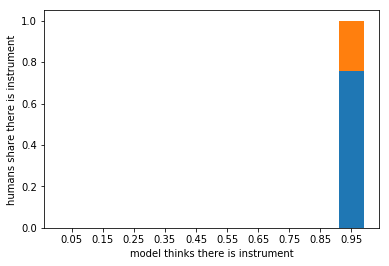

voice


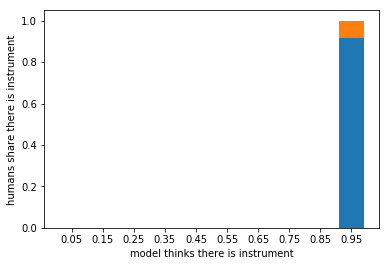

In [3]:
df_auto = pd.read_csv(path_likelihood)
print('prob of humans think instrument is there given model thinks instrument is there')
for instrument in instrument_all:
    print(instrument)
    input_file = path_project + 'cf_' + instrument + '.csv'
    df = pd.read_csv(input_file)

    likeli_pos = np.empty(0)
    for s_key in df[(df['predicted_value']) & (df['_unit_state'] == 'finalized') & (df['does_this_recording_contain_' + instrument] == 'yes')]['sample_key']:
        # print(s_key)
        likeli_pos = np.append(likeli_pos, df_auto[df_auto['sample_key'] == s_key][instrument])

    likeli_neg = np.empty(0)
    for s_key in df[(df['predicted_value']) & (df['_unit_state'] == 'finalized') & (df['does_this_recording_contain_' + instrument] == 'no')]['sample_key']:
        # print(s_key)
        likeli_neg = np.append(likeli_neg, df_auto[df_auto['sample_key'] == s_key][instrument])

    a_pos, b = np.histogram(likeli_pos, bins=np.arange(0, 1.01, 0.1))
    a_neg, _ = np.histogram(likeli_neg, bins=np.arange(0, 1.01, 0.1))

    hum_given_mod = a_pos / (a_pos + a_neg + 0.00001)
    nohum_given_mod = a_neg / (a_pos + a_neg + 0.00001)

    plt.bar(np.arange(len(b) - 1) / 1, hum_given_mod)
    plt.bar(np.arange(len(b) - 1) / 1, nohum_given_mod, bottom=hum_given_mod)
    plt.xlabel('model thinks there is instrument')
    plt.ylabel('humans share there is instrument')
    plt.xticks(np.arange(len(b) - 1), ('0.05', '0.15', '0.25', '0.35', '0.45', '0.55', '0.65', '0.75', '0.85', '0.95'))
    plt.show()